# Week 7 activity on Advertising datasets
***

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Explain the dataset

In [2]:
data = pd.read_csv('./datasets/Advertising.csv')
data.columns
#data.drop('Unnamed: 0', axis = 1, inplace =True)
#data.head().transpose()
data.rename(columns = {'Unnamed: 0':'Items'}, inplace = True)
data.head().transpose()

,0,1,2,3,4
Items,1.0,2.0,3.0,4.0,5.0
TV,230.1,44.5,17.2,151.5,180.8
Radio,37.8,39.3,45.9,41.3,10.8
Newspaper,69.2,45.1,69.3,58.5,58.4
Sales,22.1,10.4,9.3,18.5,12.9


The advertising dataset describes the sales figures of advertising for different items through TV, Radio and NewsPaper
***

### 2. Check the summary statistics

In [3]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Items,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


***

### 3. Draw a scatter plot between TV and sales and write your insights

<AxesSubplot:xlabel='TV', ylabel='Sales'>

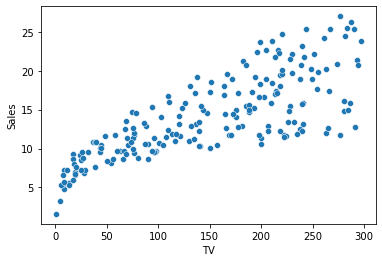

In [4]:
sns.scatterplot(x='TV', y = 'Sales', data = data)

It is clear from the scatter plot that there is a linear relationship that exist between TV advertising and sales. There exist a high '+'ve correlation.
***

### 4. Do a correlation analysis on the data set

<AxesSubplot:>

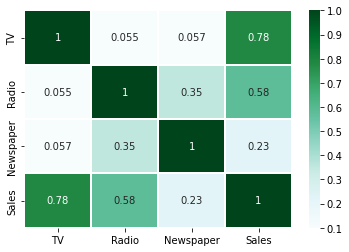

In [5]:
data_corr = data.loc[:,'TV':].corr()
sns.heatmap(data_corr, vmin = 0.1, vmax = 1, annot = True, linewidths=1.5, cmap='BuGn')

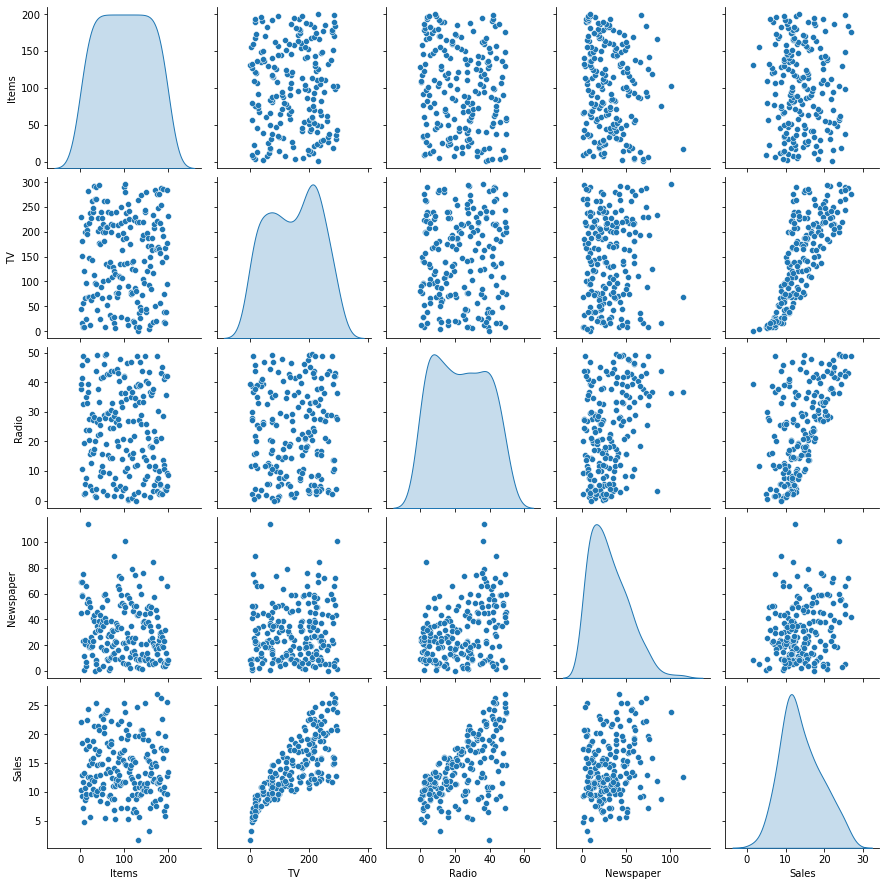

In [6]:
sns.pairplot(data, diag_kind='kde')

<u>Observations</u><br>
From both 'Heatmap' and 'PairPlot' it is evident that all the 4 advertising methods tends to have '+'ve correlation with sales.
Following observations can be made: <br> 1. **"TV"** ads has high '+'ve correlation with sales.<br>2. **Radio** ads will improve sales but not as good as TV, requires further investigation on possible causes.<br>3. **"NewsPaper"** ads is not contributing much to sales, needs clear cut investigation on whether it should be modeled.

i.e **'Sales' has a linear relationship** between all 4 advertising methods but linearity varies from **TV > Radio > NewsPaper**. This further implies that a **linear model** can be deployed to predict sales figures based on advertising counts. 
***

### 5. Fit a linear regression model on the dataset

In [7]:
import sklearn.model_selection as ms
import sklearn.metrics as mt
import sklearn.linear_model as lm

In [8]:
X, y = data[['TV','Radio', 'Newspaper']], data['Sales']

In [9]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, random_state=59, test_size=50)

In [10]:
lr_predictor = lm.LinearRegression()
model = lr_predictor.fit(X_train, y_train)
# Model is
print(f'Model slopes are {model.coef_} and model intercept is {model.intercept_}')

Model slopes are [ 0.04591017  0.18277184 -0.00024759] and model intercept is 2.9863917443927868


In [11]:
predicted_sales = model.predict(X_test)

In [12]:
print(f'MSE for the model is {mt.mean_squared_error(y_test, predicted_sales)}')

MSE for the model is 2.081054093013245
